# Проект по разделу "Принятие решений в бизнесе"

## Постановка задачи

### Контекст
я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам предстоит приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### План
- Выполнить предобработку данных;
- Приоритизация гипотез;
- Анализ A/B-теста;
- Общий вывод.





## предобработка данных
### Загрузка библиотек и данных

In [ ]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Предварительный просмотр данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
data.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


visitors.duplicated().sum()

In [ ]:
orders.duplicated().sum()

0

In [ ]:
data.duplicated().sum()

0

### Предобработка данных

In [ ]:
# Приведем название столбцов data к нижнему регистру
data.columns = [x.lower() for x in data.columns]

In [ ]:
data.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
# изменим тип данных в датах
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод:**
Загрузили библиотеки, загрузили данные в датафреймы.
Проверили отсутсвие пропусков и явных дубликатов.
Привели к соответсвию типы даты и времени.
привели названия столбцов к нижнему регистру.
Данные готовы для дальнейшей работы.


In [ ]:
orders['date'].describe()

/tmp/ipykernel_217/4197849394.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['date'].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

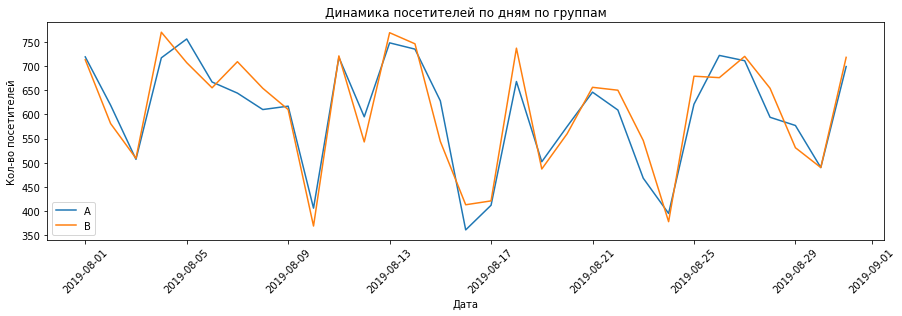

In [ ]:
plt.figure(figsize=(15, 4))
visitors_A = visitors[visitors['group']=='A']
visitors_B = visitors[visitors['group']=='B']
plt.plot(visitors_A['date'], visitors_A['visitors'], label='A')
plt.plot(visitors_B['date'], visitors_B['visitors'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Динамика посетителей по дням по группам")
plt.ylabel("Кол-во посетителей")
plt.xlabel("Дата")

plt.show()

<div class="alert alert-info"> <b>Комментарий :</b> Динамика посетителей по дням в обеих группах примерно на одном уровне. .</div>

## Приоритизация гипотез
### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Прежде чем переходить к приоритезации гипотез, убедимся, что у нас в выборке только две группы и оценим количество пользователей групп.

In [ ]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [ ]:
orders.groupby('group', as_index=False).agg({'visitorId': pd.Series.nunique})

,group,visitorId
0,A,503
1,B,586


Как и должно быть, у нас всего две группы А и В. В группе В на 16,5% пользователей больше. Перейдем к применению фреймворка ICE.

In [ ]:
pd.options.display.max_colwidth = 200

In [ ]:
data['ICE'] = (data['impact'] * data['confidence']/data['efforts']).round(2)
data['ICE'] = (data['ICE'].astype('float')).round(2)
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Гипотезы приоритизированы в порядке убывания приоритета, однако не отображается полный текст гипотезы. Добавим в код выше настройку для расширения вывода текста pd.options.display.max_colwidth = 200

**Вывод:** Применили фреймворк ICE, выделили три наиболее перспективные гипотезы 8,0,7

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']
data['RICE'] = data['RICE'].astype('float')
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Применили фреймворк RICE, выделили три наиболее перспективные гипотезы 7,2,0

Фреймворк RICE дополнительно использует параметр охвата пользователей, таким образом приоритет гипотез изменился и гипотеза 8 ушла на 5-е место.
В качестве перспективных гипотез на основе ICE и RICE предлагается оставить следующие гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

## Анализ A/B-теста
### Оценка уникальных пользователей

Прежде чем приступать к дальнейшим шагам, в предыдущем разделе мы увидели, что ысего уникальных пользователей 503 в группе А и 586 в группе В. Всего 1089, а заказов 1197. Посчитаем есть ли пользователи, которые попали в обе группы.

In [ ]:
visitorId_unique_before = len(orders['visitorId'].unique())
visitorId_A = orders['visitorId'].loc[orders['group']=='A'].unique()
visitorId_B = orders['visitorId'].loc[orders['group']=='B'].unique()
visitorId_AB = np.intersect1d(visitorId_A,visitorId_B)
len(visitorId_AB)

58

Таких пользователей оказалось 58. Исключим данных пользователей из дальнейшего анализа и посмотрим какой процент уникальных пользователей мы потеряем.

In [ ]:
orders = orders.loc[((orders['visitorId'].isin(list(visitorId_AB))!=True))]
visitorId_unique_after = len(orders['visitorId'].unique())
round(100-100*visitorId_unique_after/visitorId_unique_before,1)

5.6

### Построим график кумулятивной выручки по группам

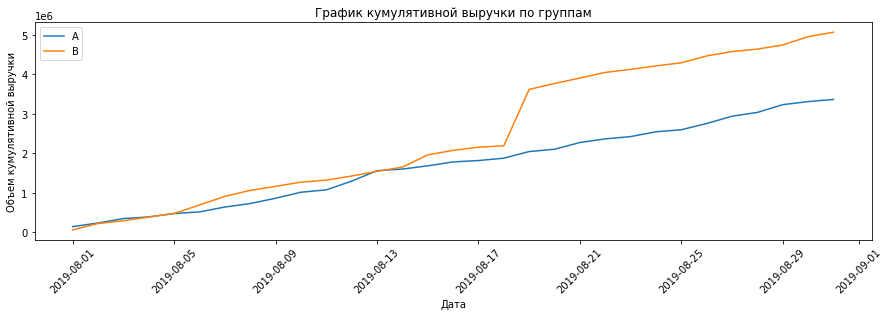

In [ ]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивной выручки по группам")
plt.ylabel("Объем кумулятивной выручки")
plt.xlabel("Дата")
plt.show()

**Вывод:** Группа В показывает более высокое значение выручки, однако разница незначительная. При этом 13.08.2019г. выручка между группами выравнивается, а 18.08.2019г. в группе В наблюдается резкий скачок. Причиной такого роста могут быть аномальные значения.

**В общем кумулятивная выручка группы В к концу теста выше группы А это может быть связано как с увеличением конверсии, так и с увеличением среднего чека.**

### Построим график кумулятивного среднего чека по группам

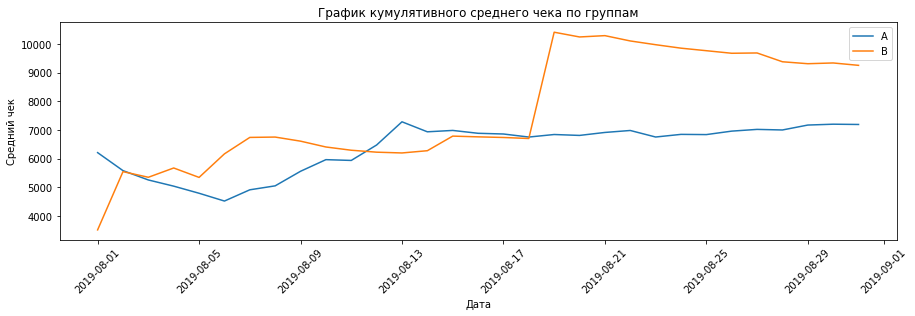

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.show()

**Вывод:** Кумулятивный средний чек по группам колеблится и линии графиков А и В пересекаются трижды. Как и в показателях выручки 18.08.2019г. в группе В наблюдается резкий скачок, а затем тенденция к снижению до конца рассматриваемого периода. Таким образом однозначный вывод на данном этапе сделать нельзя. Необходима проверка аномальных значений.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

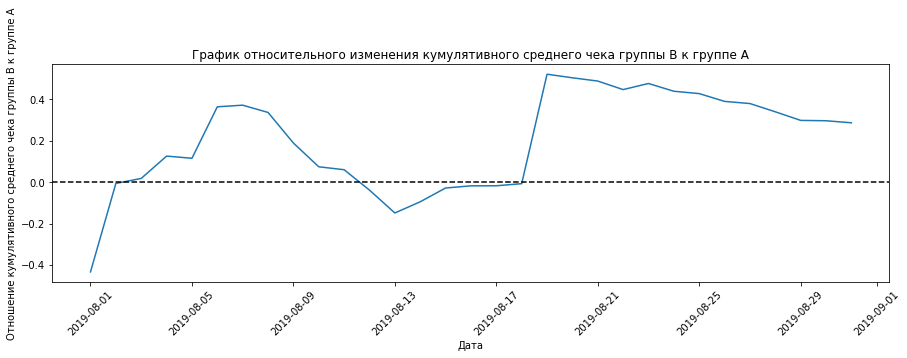

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel("Отношение кумулятивного среднего чека группы В к группе А")
plt.xlabel("Дата")
plt.show()

**Вывод**: так же как и в предыдущих графиках показатели среднего чека группы Взначительно выше группы А и в пиковом значении превышают на 40%, однако наблюдаются резкие скачки, необходимо исследовать выбросы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

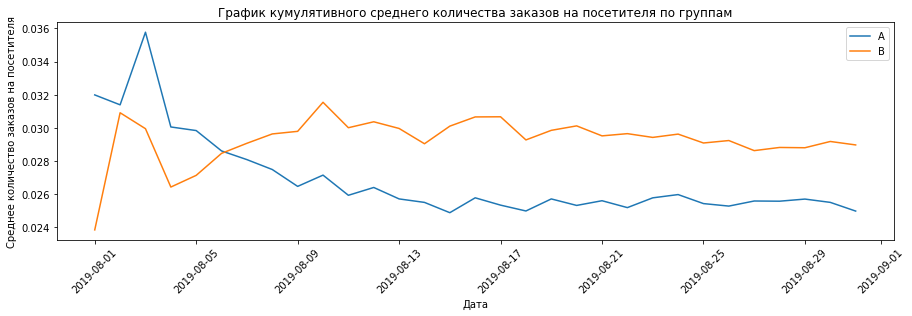

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.show()

**Вывод**: Начиная с 6-го дня теста значения кумулятивного среднего количества заказов на посетителя группы В стабильно превышают значения группы А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

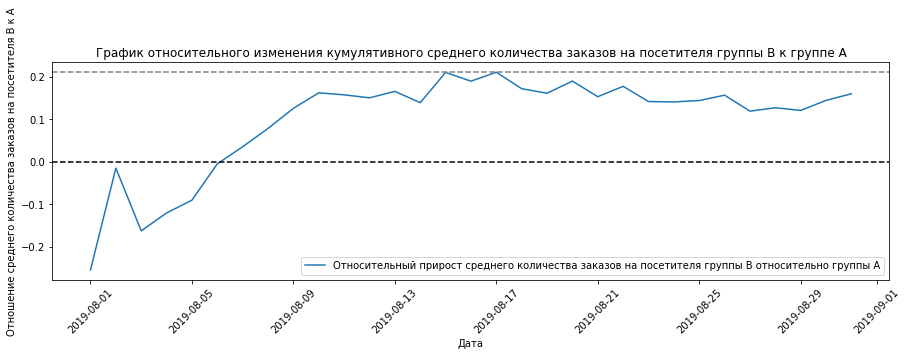

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel("Отношение среднего количества заказов на посетителя В к А")
plt.xlabel("Дата")
plt.show()

**Вывод:** Как и на предыдущем графике показатели группы В с 06.08.2019г. стабильно выше показателей группы А, при этом превышение начиная с 10.08.2019г. колеблится в пределах 10-20%.

### Построим точечный график количества заказов по пользователям

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

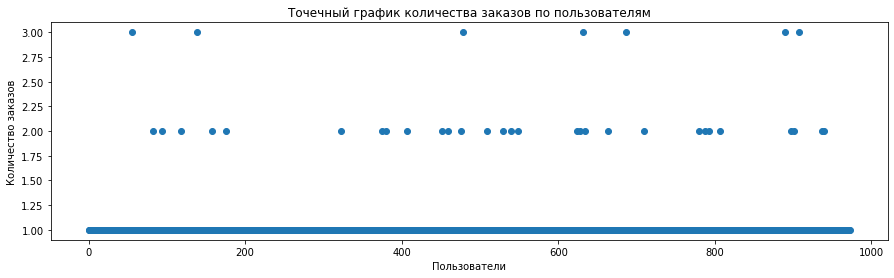

In [ ]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

**Вывод:** Основная часть пользователей делали 1 заказ.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод:** Значение 99 перцентиля - 2, это означает, что 3 заказа делал не более 1% пользователей. Пользователей, сделавших 3 заказа считаем аномальными.

### Построим точечный график стоимостей заказов.

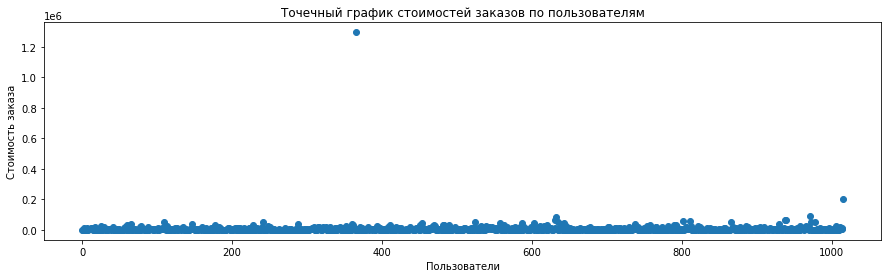

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.show()

**Вывод:** На графике видно аномальное значение (более 1.2 млн руб.). Остальные заказы не превышают 100 тыс. руб. Скорее всего данное значение искажает результаты группы В в точке даты 18.08.2019г.

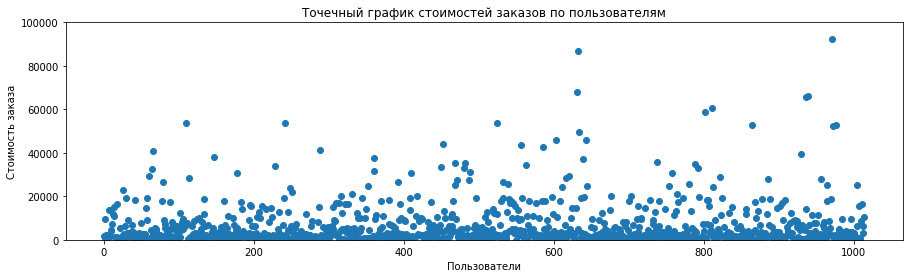

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.ylim([0, 100000])
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Построил новый график с ограничением по оси У до 100 тыс. руб. Увидел более подробно распределение заказов. Так же увидел опечатку в предыдущем выводе выше "Остальные заказы не превышают 20 тыс. руб.", имел ввиду 200 тыс. руб., но с учетом более масштабного графика исправил на 100 тыс. руб.</div>

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** Значение 99 перцентиля - 53904, это означает, что заказы выше этой суммы делал не более 1% пользователей. С учетом точечного графика можем считать аномалиями все заказы выше 20 тыс. руб, но для сохранения общих правил (изученных в теоретической части), будем считать аномальными значениями заказы выше 53904 руб.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем количестве заказов между группами есть.
        
Используем готовый код, изученный в теоретической части.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value =' ,"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

P-value = 0.01102


**Вывод:** Значение P-value меньше 0.05, следовательно нулевую гепотезу **отвергаем**.

In [ ]:
print('Превышение количества заказов в группе Б относительно группы А составлят', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Превышение количества заказов в группе Б относительно группы А составлят 0.160


**Вывод:** Среднее количество заказов на посетителя группы В на 16% больше чем в группе А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть.

In [ ]:
print('P-value =' ,'{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

P-value = 0.82949


**Вывод:** Значение P-value больше 0.05, следовательно нулевую гепотезу **не отвергаем**.

In [ ]:
print('Превышение среднего чека заказа в группе Б относительно группы А составлят', '{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Превышение среднего чека заказа в группе Б относительно группы А составлят 0.28660


**Вывод:** Средний чек заказа группы В на 28,6% больше чем в группе А. Поскольку относительное различие среднего чека между сегментами составляет ~26%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество исключаемых пользователей, совершивших более 3 заказа и заказы свыше 53904 руб. =', abnormalUsers.shape[0])

Количество исключаемых пользователей, совершивших более 3 заказа и заказы свыше 53904 руб. = 16


In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value =', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

P-value = 0.00702


**Вывод:** Значение P-value по "очищенным" данным снизилось по сравнению с предыдущим результатом и по прежднему остается меньше 0.05, следовательно вывод не изменился.

In [ ]:
print('Превышение количества заказов в группе Б относительно группы А составлят', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Превышение количества заказов в группе Б относительно группы А составлят 0.189


**Вывод:** Процент превышения количества заказов в группе Б относительно группы А по "очищенным" данным незначительно увеличился с 16% до 18,9%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('P-value =' ,
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

P-value = 0.788


**Вывод:** Значение P-value по "очищенным" данным снизилось по сравнению с предыдущим результатом, но по прежднему остается больше 0.05, следовательно вывод не изменился.

In [ ]:
print('Превышение среднего чека заказа в группе Б относительно группы А составлят',
    '{0:.5f}'.format(

            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean() /
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean()-1
    )
)

Превышение среднего чека заказа в группе Б относительно группы А составлят 0.03342


**Вывод:** А вот процент различия в среднем чеке заказа между группами по "очищенным" данным относительно "сырых" снизился значительно с 28,6% до 3,3%. Исключение аномальных показателей значительно повлияло на результат.  

### Примем решение по результатам теста и объясним его.

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Вывод:** среднее количество заказов на посетителя в группе В по "сырым" и по "очищенным" данным превышает среднее количество заказов группы А.
Различий в среднем чеке заказа между группами по "сырым" и по "очищенным" данным нет.

**Решение: тест можно остановить и зафиксировать победу группы В.**